In [21]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn import show_versions
import warnings
import  pickle



##VAMOS A LEER EL CONJUNTO DE DATOS (DATA SET, DATAFRAME)
#** SE REALIZARA UNA REVISION GENERAL Y DESCRIPTIVA  DE LOS DATOS

In [30]:
#Asegurarnos de que lee adecuadamente el archivo y conocer de forma general los datos
df = pd.read_excel('/content/Data_clean para portafolio.xlsx')
print(df.head())

   OverallQual  GrLivArea  GarageArea  TotalBsmtSF  FullBath  YearBuilt  \
0            7       1710         548          856         2       2003   
1            6       1262         460         1262         2       1976   
2            7       1786         608          920         2       2001   
3            7       1717         642          756         1       1915   
4            8       2198         836         1145         2       2000   

   PoolArea  SalePrice  
0         0     208500  
1         0     181500  
2         0     223500  
3         0     140000  
4         0     250000  


In [5]:
df.head(10)

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,FullBath,YearBuilt,PoolArea,SalePrice
0,7,1710,548,856,2,2003,0,208500
1,6,1262,460,1262,2,1976,0,181500
2,7,1786,608,920,2,2001,0,223500
3,7,1717,642,756,1,1915,0,140000
4,8,2198,836,1145,2,2000,0,250000
5,5,1362,480,796,1,1993,0,143000
6,8,1694,636,1686,2,2004,0,307000
7,7,2090,484,1107,2,1973,0,200000
8,7,1774,468,952,2,1931,0,129900
9,5,1077,205,991,1,1939,0,118000


# PREPARACIÓN DE LOS DATOS

In [6]:
df.isnull().sum().sort_values(ascending=False)


,0
OverallQual,0
GrLivArea,0
GarageArea,0
TotalBsmtSF,0
FullBath,0
YearBuilt,0
PoolArea,0
SalePrice,0


<Axes: >

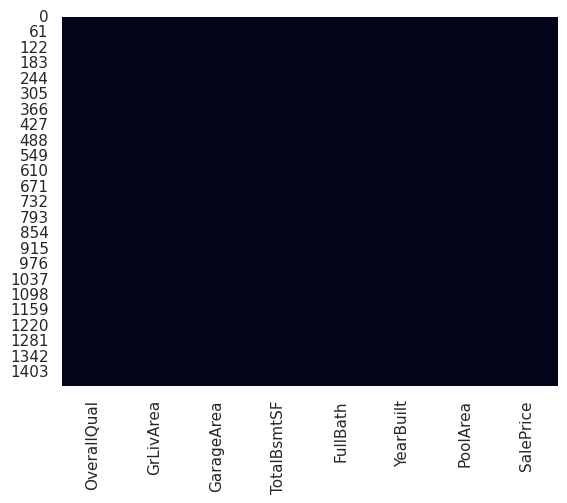

In [6]:
#Grafica para observar a siemple vista los valores nulos
sns.set_theme(style="whitegrid")
sns.heatmap(df.isnull(), cbar=False)

Esta gráfica muestra que no hay valores nulos.

# Análisis general de los datos

In [7]:
#forma de la matriz
df.shape



(1460, 8)

In [7]:
#Descripcion estad[istica general de los datos
df.describe()

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,FullBath,YearBuilt,PoolArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,472.980137,1057.429452,1.565068,1971.267808,2.758904,180921.195890
std,1.382997,525.480383,213.804841,438.705324,0.550916,30.202904,40.177307,79442.502883
min,1.000000,334.000000,0.000000,0.000000,0.000000,1872.000000,0.000000,34900.000000
25%,5.000000,1129.500000,334.500000,795.750000,1.000000,1954.000000,0.000000,129975.000000
50%,6.000000,1464.000000,480.000000,991.500000,2.000000,1973.000000,0.000000,163000.000000
75%,7.000000,1776.750000,576.000000,1298.250000,2.000000,2000.000000,0.000000,214000.000000
max,10.000000,5642.000000,1418.000000,6110.000000,3.000000,2010.000000,738.000000,755000.000000


In [9]:
# Total de registros por tipo de variable
df.dtypes.value_counts()

,count
int64,8


In [10]:
df.columns

Index(['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath',
       'YearBuilt', 'PoolArea', 'SalePrice'],
      dtype='object')

In [11]:
# Descripción de variable objetivo
df['SalePrice'].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [8]:
correlaciones= df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
print(correlaciones)

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageArea     0.623431
TotalBsmtSF    0.613581
FullBath       0.560664
YearBuilt      0.522897
PoolArea       0.092404
Name: SalePrice, dtype: float64


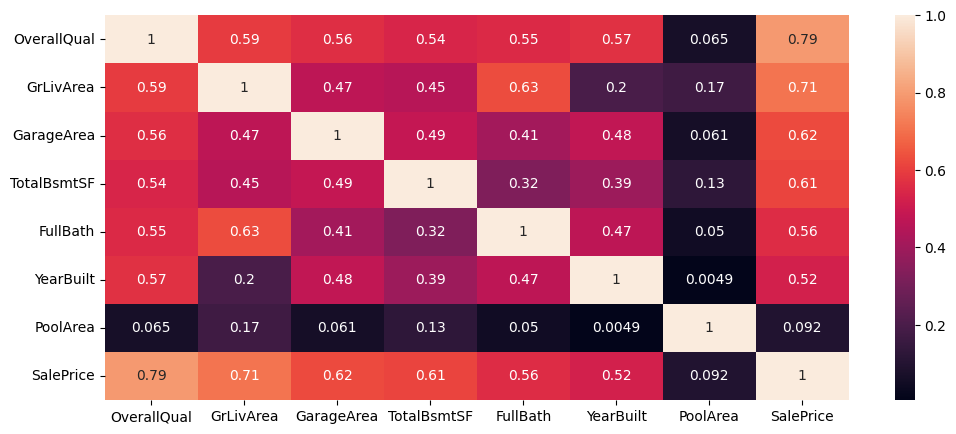

In [9]:
plt.figure(figsize=(12,5), dpi=100)
sns.heatmap(df.corr(), annot=True)
plt.show()


Las correlaciones nos ayudan a determinar que variables usamos para el análisi , y que variables vamos a meter en el modelo de regresión.

Las correlaciones más altas indican mayor incidencia o influencia en el precio de venta de una casa, por lo tanto seran las variables que usaremos. Y como se observa OverallQuall y GrLivArea son las que más determinan.


# ESTADISTICA DESCRIPTIVA DE LOS DATOS

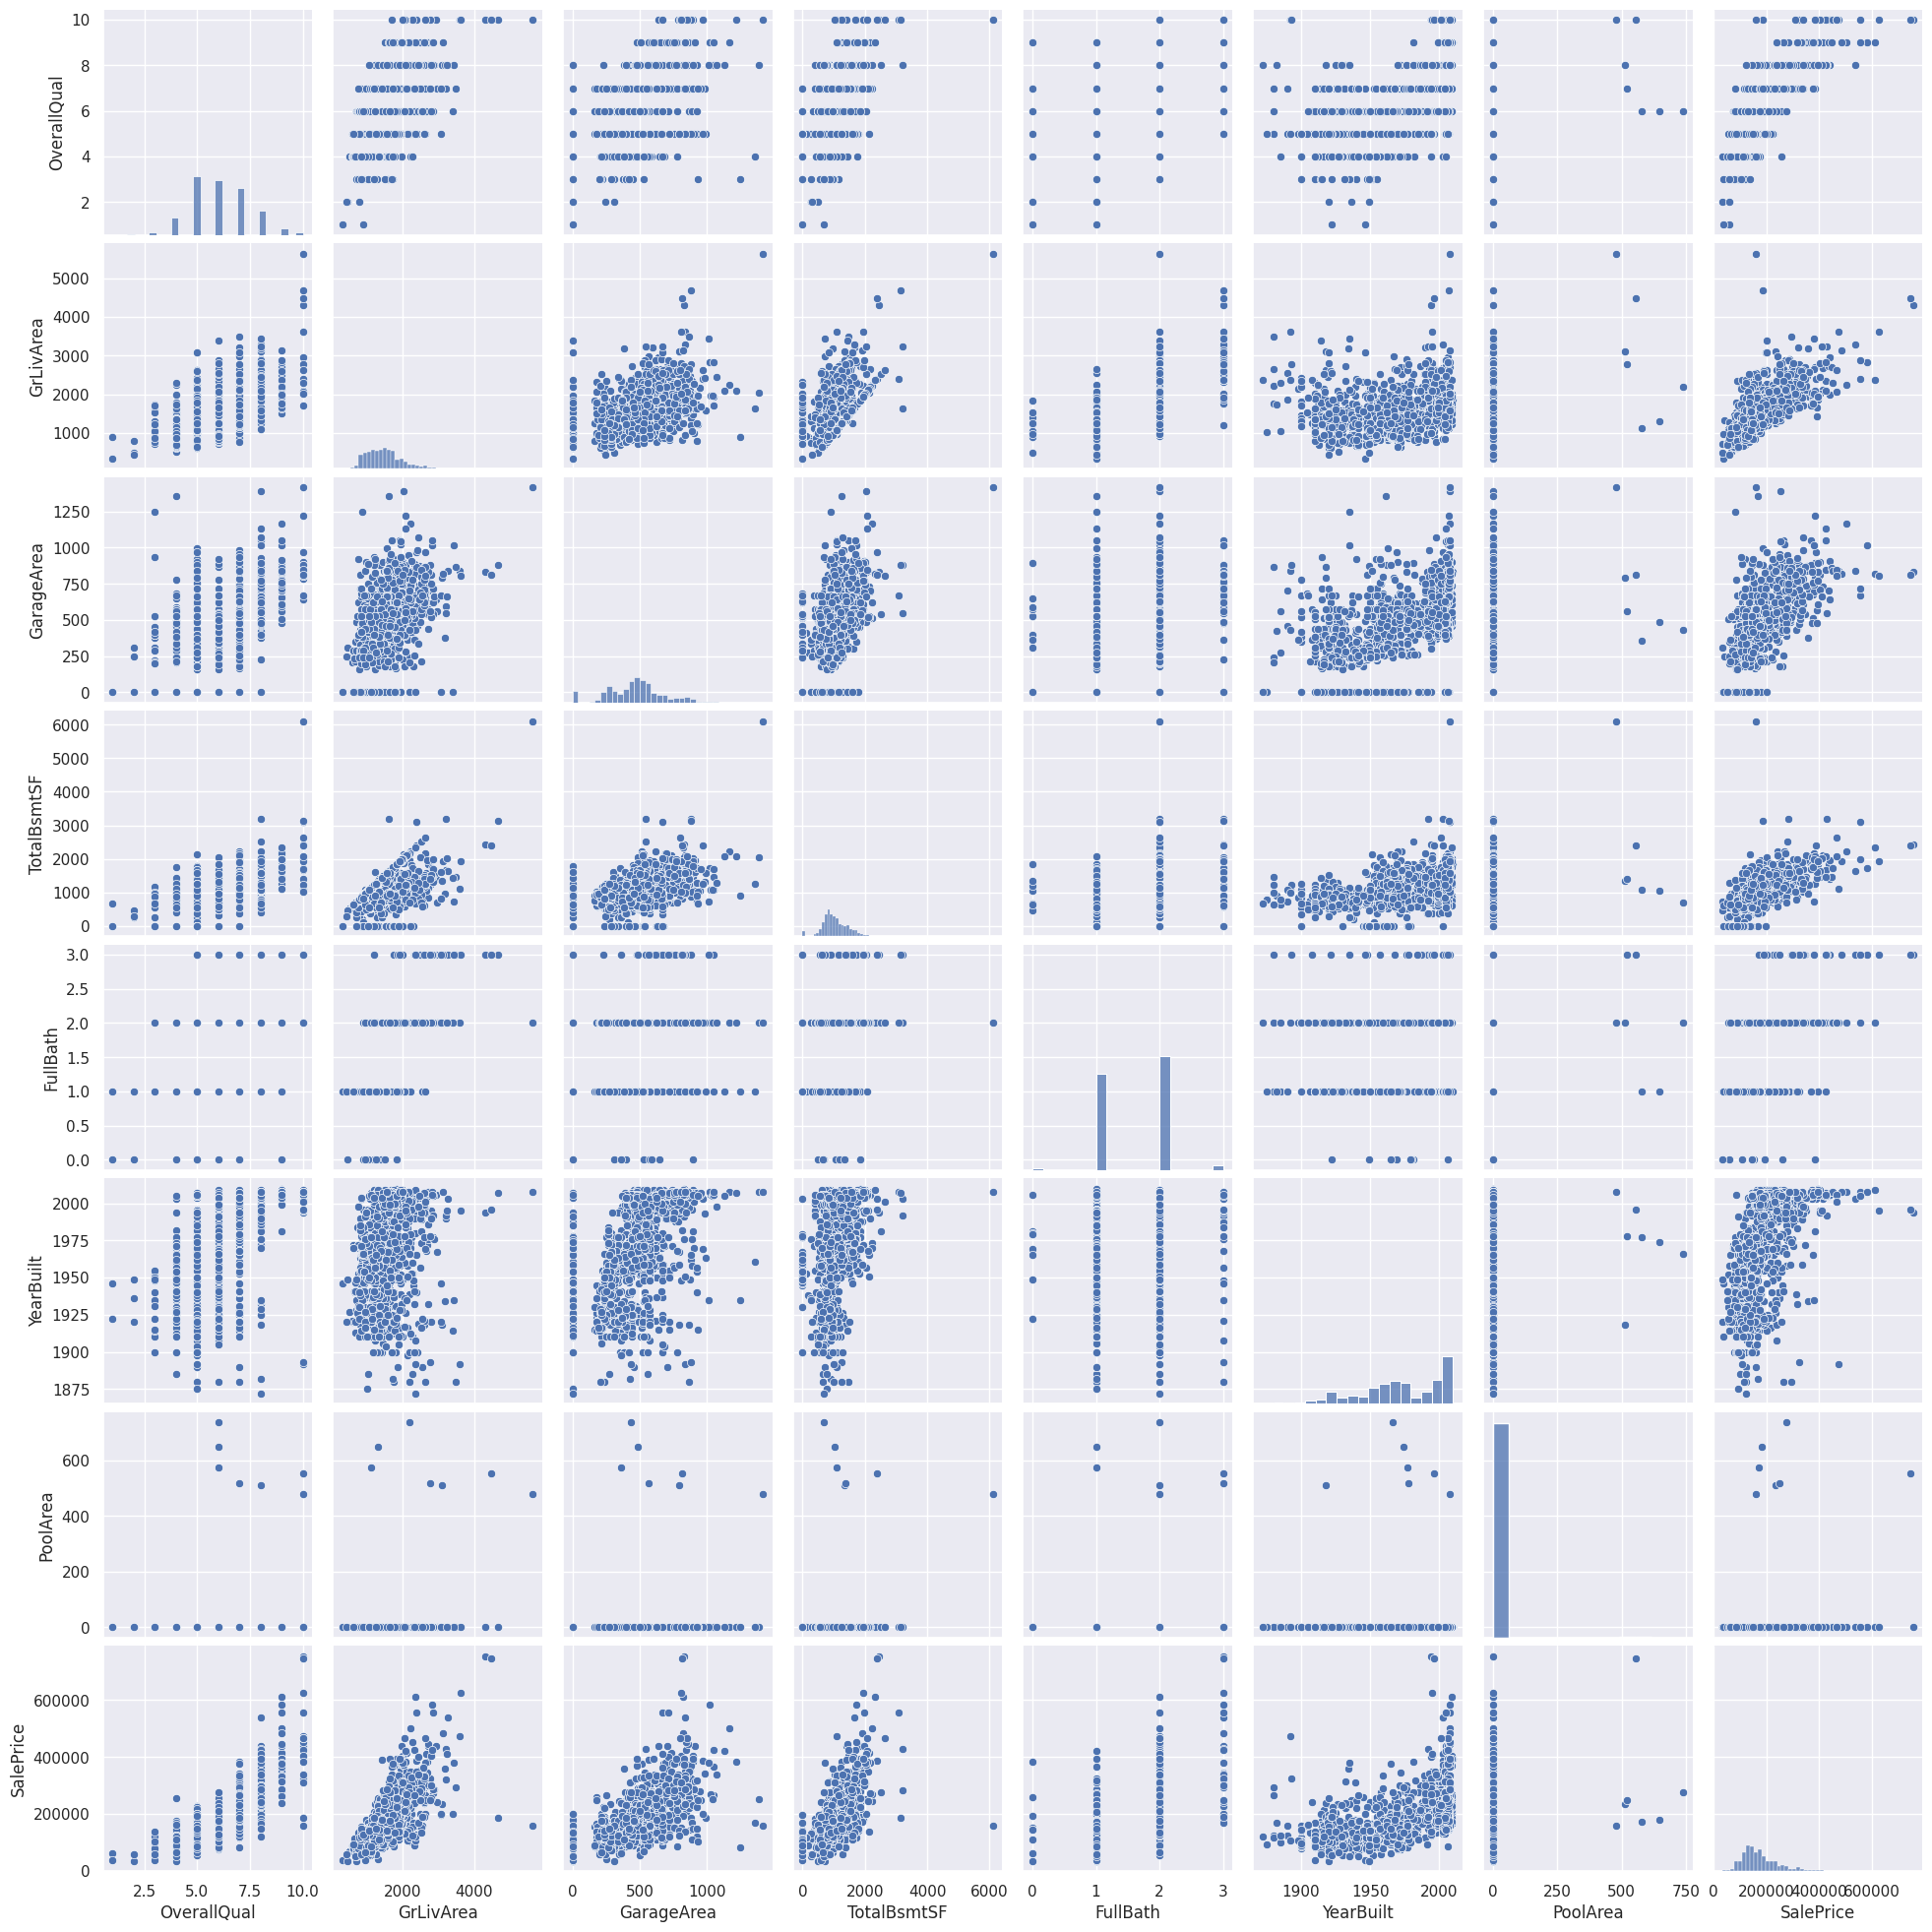

In [13]:
sns.set_style('darkgrid')
sns.pairplot(df)

# **Ahora veremos el detalle de la relación entre la varaible objetivo y las demas variables**

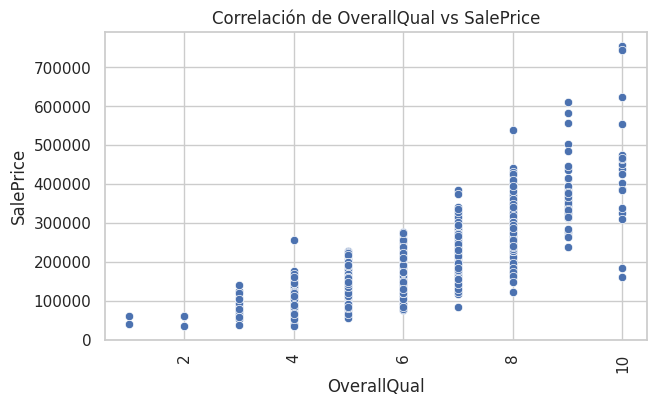

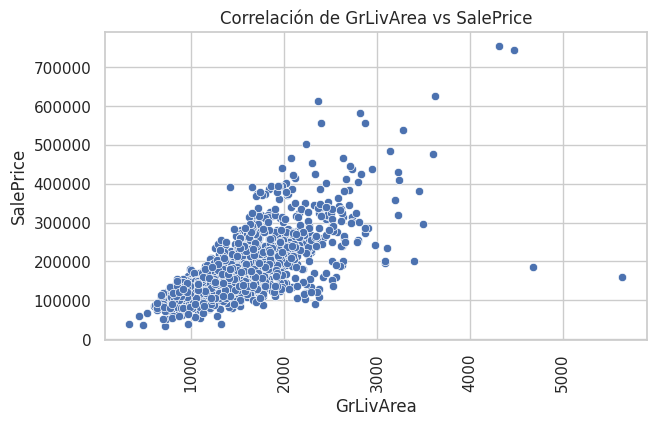

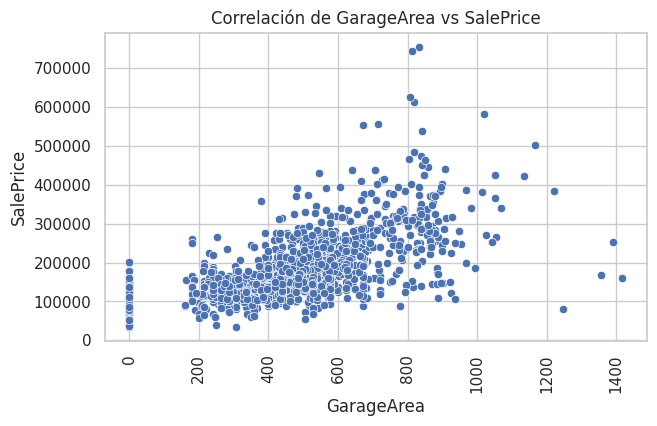

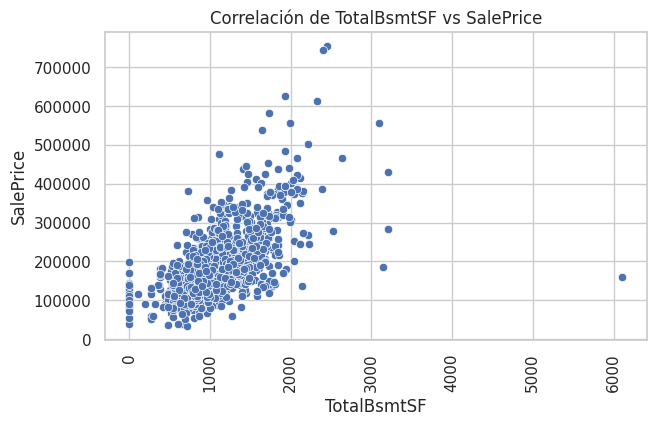

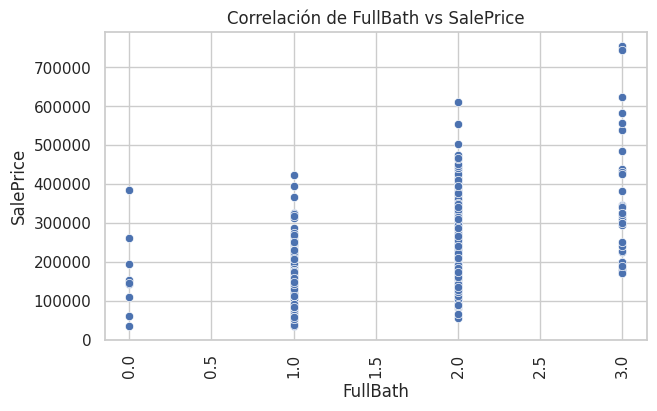

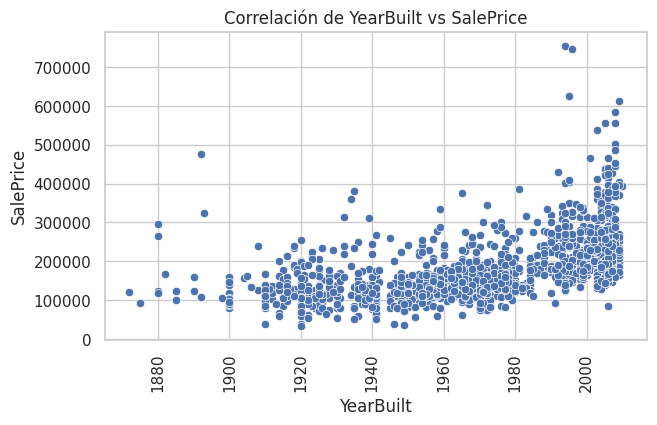

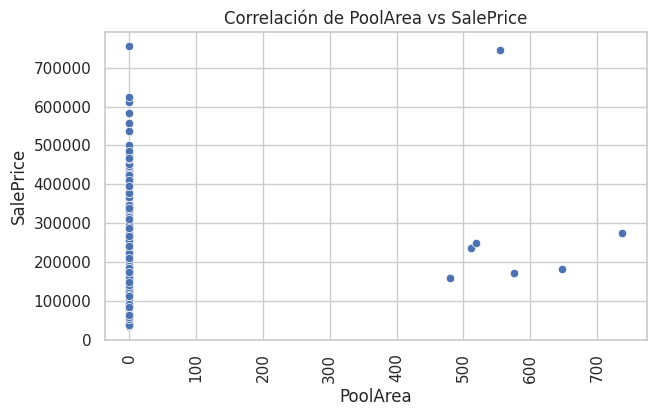

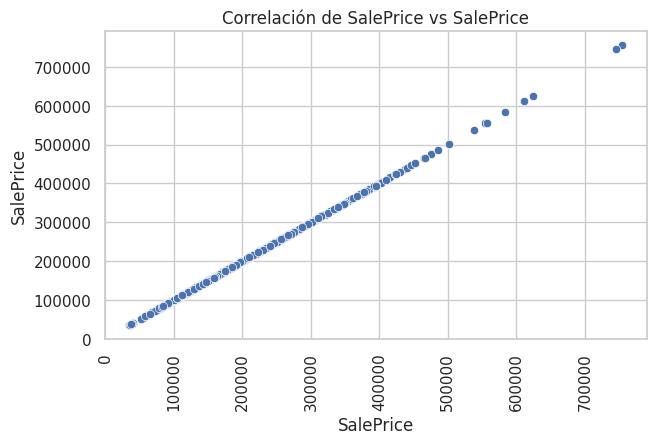

In [14]:
# Visualización entre la correlación entre las variables y la variable objetivo "SalesPrice"
for var_num in df.select_dtypes(np.number):
  plt.figure(figsize= (7,4), dpi=100)
  sns.scatterplot(x=var_num, y='SalePrice', data=df)
  plt.title(f'Correlación de {var_num} vs SalePrice')
  plt.xlabel(var_num)
  plt.ylabel('SalePrice')
  plt.xticks(rotation=90)
  plt.show()

# En estos gráficos se aprecia que la correlación entre el precio del inmueble y principalmente las variables:  OverallQual, GrLivArea, GarageArea,  TotalBsmtSF y YearBuilt son positivas, son los factores que más intervienen el la estimaicón del precio. sin embargo, al concoer un poco del negocio, sabemos que la variable  también aumenta el precio del inmuble, en este caso no se refleja, debido a que la base de datos original, y la utilizada ya liempia y depurada, la mayoría de los datos no estaban presentes y n alcanza a estimarse la influencia de esta variable, con repecto a la variable FullBath si se conoce del negocio, tambien sabemos que es importante para determinar el precio.  
      
  

Ahora vamos a revisar el tipo de distribución que tiene la variable **objetivo**

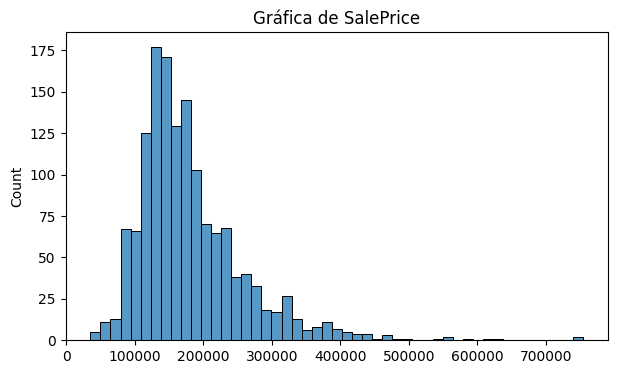

In [31]:
plt.figure(figsize= (7,4), dpi=100)
sns.histplot(df['SalePrice']).set(title=f'Gráfica de SalePrice', xlabel=None);

La distribución de precios de casas está sesgada a la derecha, concentrada en precios bajos-medios, con algunos valores atípicos de casas muy caras. Para análisis predictivo, conviene transformar la variable o usar modelos que manejen bien distribuciones no normales.

# Análisis general de la distribución

No es normal (asimetría positiva / sesgo a la derecha):

La mayoría de las casas se concentran en un rango entre 100,000 y 250,000.

Sin embargo, hay valores que se extienden hasta 700,000, lo que genera una cola larga a la derecha.

Esto indica asimetría positiva (skewness > 0).

Moda y concentración:

El pico más alto está alrededor de 150,000 – 200,000, lo que significa que la mayoría de las casas se venden en ese rango.

Valores atípicos (outliers):

Existen pocas observaciones por encima de 400,000, que son casas de mayor valor.

Estos outliers pueden distorsionar modelos de regresión si no se tratan (ej: normalización, log-transform, o modelos robustos).

Varianza alta:

Hay una dispersión notable: los precios varían desde menos de 100,000 hasta más de 700,000.

Esto indica un rango amplio en el mercado de casas, probablemente explicado por variables como tamaño, ubicación, antigüedad o calidad de construcción.

Implicaciones para modelado:

Dado que no es normal, aplicar modelos que asumen normalidad directa (ej: regresión lineal sin transformación) puede dar errores en los residuos.

Una práctica común es aplicar una transformación logarítmica a la variable SalePrice para reducir la asimetría y estabilizar la varianza.

# **MODELADO**

In [41]:
# Definir valores de X y Y para modelo de aprendizaje supervisado
X= df.drop(columns=['SalePrice']).values
y= df['SalePrice'].values
print(f'{X.shape=}')
print(f'{y.shape=}')

X.shape=(1460, 7)
y.shape=(1460,)


Al ser un modelo de **aprendizaje supervisado**, es decir, utiliza datos etiquetados para predecir el resultado, debemos separar el conjunto de datos en entrenamiento y prueba, con 70/30 para regresión.

In [42]:
# Dividir conjunto de datos en entrenamiento y prueba con 70/30 para regresión
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'{x_train.shape=}')
print(f'{x_test.shape=}')
print(f'{y_train.shape=}')
print(f'{y_test.shape=}')

x_train.shape=(1022, 7)
x_test.shape=(438, 7)
y_train.shape=(1022,)
y_test.shape=(438,)


Para poder comparar dos prediccones distintas, utilizaremos dos modelos diferentes de aprendizaje supervisado: árbol de decisión para regresión y random forest.
Mientras que un Árbol de Decisión divide los datos para hacer predicciones de regresión (valor numérico) o clasificación (categoría), el modelo Random Forest mejora la precisión y reduce el sobreajuste combinando las predicciones de múltiples árboles de decisión, obteniendo el resultado final mediante el promedio (regresión) o la votación mayoritaria (clasificación).

**¿Por qué es útil usar ambos en tu proyecto?**

1.Comparación de desempeño:
Árbol de decisión → modelo base, sencillo de entender.
Random Forest → modelo más robusto, ideal para ver si mejora la precisión.

2.Balance entre interpretabilidad y rendimiento:
Con el árbol puedes mostrar las reglas de decisión (útil para explicar a no técnicos).
Con Random Forest tienes un modelo más confiable para predicciones reales.

3.Importancia de variables:
Ambos permiten medir qué variables afectan más al precio (ej: superficie, ubicación, número de habitaciones).
Esto te ayuda a justificar el análisis además de la predicción.


In [65]:
# Definir modelo: árbol de decisión para regresión
mod_dt_reg= DecisionTreeRegressor(max_depth=2,random_state=0)

#Entrenar
mod_dt_reg.fit(x_train, y_train)

#Predecir
y_pred_dt_reg= mod_dt_reg.predict(x_test)

In [66]:
#Definir el modelo Random Forest para regresión
mod_rf_reg= RandomForestRegressor(max_depth=2, random_state=0)

#Entrenar
mod_rf_reg.fit(x_train, y_train)

# Predecir
y_pred_rf_reg = mod_rf_reg.predict(x_test)


# **EVALUACIÓN Y ENTRENAMIENTO**

In [73]:
#Evaluar modelo de árbol de decisión para regresión: Método RMSE
#rmse_dt_reg = mean_squared_error(y_test, y_pred_dt_reg)
rmse_dt_reg= np.sqrt(mean_squared_error(y_test, y_pred_dt_reg))
print(f'{rmse_dt_reg = :.5}')


rmse_dt_reg = 4.8115e+04


In [74]:
# Evaluar modelo de random forest para regresión
rmse_rf_reg = np.sqrt(mean_squared_error(y_test, y_pred_rf_reg))
print(f'{rmse_rf_reg = :.2f}')

rmse_rf_reg = 45236.62


In [75]:
# 5. Métricas de evaluación para RandomForest
mae = mean_absolute_error(y_test, y_pred_rf_reg)
mse = mean_squared_error(y_test, y_pred_rf_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf_reg)

print("📊 Evaluación del modelo Random Forest:")
print(f"MAE : {mae:.2f}")
print(f"MSE : {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²  : {r2:.3f}")


📊 Evaluación del modelo Random Forest:
MAE : 30151.65
MSE : 2046351448.27
RMSE: 45236.62
R²  : 0.707


In [76]:
# 5. Métricas de evaluación para DecissionTree
mae = mean_absolute_error(y_test, y_pred_dt_reg)
mse = mean_squared_error(y_test, y_pred_dt_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_dt_reg)

print("📊 Evaluación del modelo DecissionTree:")
print(f"MAE : {mae:.2f}")
print(f"MSE : {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²  : {r2:.3f}")

📊 Evaluación del modelo DecissionTree:
MAE : 33648.98
MSE : 2315098363.25
RMSE: 48115.47
R²  : 0.668


In [77]:
pd.DataFrame([rmse_dt_reg, rmse_rf_reg], index=["Decision Tree", "Random Forest"], columns=['RMSE'])

,RMSE
Decision Tree,48115.469064
Random Forest,45236.616234


In [78]:
# Guardar modelo
modelo_rf= mod_rf_reg
model_type= 'regresion'
library_version= 'rf_sklearn' + '_' + sklearn.__version__.replace('.','_')
model_name= model_type + '_' + library_version + '.pickle'

pickle.dump(modelo_rf, open("regresion_RandomForestRegressor.pkl", "wb"))

print(type(modelo_rf))
print('Saved model: ' + model_name)


<class 'sklearn.ensemble._forest.RandomForestRegressor'>
Saved model: regresion_rf_sklearn_1_7_2.pickle


In [79]:
# Guardar modelo
modelo_dt = mod_dt_reg
model_type = 'regression'
library_version = 'Decicion_TreeRegressor' + '_' + sklearn.__version__.replace('.','_')
model_name = model_type + '_' + library_version + '.pickle'

pickle.dump(modelo_dt, open("regresion_DecisionTreeRegressor.pkl", "wb"))

print(type(modelo_dt))
print('Saved model: ' + model_name)

<class 'sklearn.tree._classes.DecisionTreeRegressor'>
Saved model: regression_Decicion_TreeRegressor_1_7_2.pickle


In [57]:
!ls

'Data_clean para portafolio.xlsx'   regresion_RandomForestRegressor.pkl
 drive				    sample_data


# **PREDICCIÓN**

In [80]:
#aseguramos que estan los dos modelos
print("regresion_RandomForestRegressor.pkl")
print("regresion_DecisionTreeRegressor.pkl")

regresion_RandomForestRegressor.pkl
regresion_DecisionTreeRegressor.pkl


In [82]:
# Leer modelos (usa los nombres de archivo, no las variables modelo)
reg_model_rf = pickle.load(open("regresion_RandomForestRegressor.pkl", "rb"))
reg_model_dt = pickle.load(open("regresion_DecisionTreeRegressor.pkl", "rb"))


Ahora creamos una matriz de Numpy, para utilizar como datos nuevos, y poder hacer una **prediccion**

In [90]:
# Nuevos datos de [	OverallQual,	GrLivArea,	GarageArea,	TotalBsmtSF,	FullBath,	YearBuilt,	PoolArea	]
X_new = np.array([[  9,	1607,	192,	156,	1,	2015,	0]])
x_new1= np.array([[  7,	1710,	548,	856,	2,	2003,	0]])
x_new2= np.array([[6,	1262,	460,	1262,	2,	1976,	0]])
x_new3= np.array([[7,	1786,	608,	920,	2,	2001,	0]])
x_new4= np.array([[5,	1256,	276,	1256,	1,	1965,	0]])

In [91]:
# Estimación de precio con el modelo Random Forest
y_new = reg_model_rf.predict(X_new)
np.round(y_new, 2)

array([302552.35])

In [92]:
# Estimación de precio con el modelo DecisionTreeRegressor
y_new = reg_model_dt.predict(X_new)
np.round(y_new, 2)

array([377710.29])

In [93]:
# Estimación de precio con el modelo Random Forest
y_new = reg_model_rf.predict(x_new1)
np.round(y_new, 2)

array([200743.21])

In [94]:
# Estimación de precio con el modelo DecisionTreeRegressor
y_new = reg_model_dt.predict(x_new1)
np.round(y_new, 2)

array([206433.65])

In [95]:
# Estimación de precio con el modelo Random Forest
y_new = reg_model_rf.predict(x_new2)
np.round(y_new, 2)

array([139893.18])

In [96]:
# Estimación de precio con el modelo DecisionTreeRegressor
y_new = reg_model_dt.predict(x_new2)
np.round(y_new, 2)

array([141325.95])

In [97]:
# Estimación de precio con el modelo Random Forest
y_new = reg_model_rf.predict(x_new3)
np.round(y_new, 2)

array([200743.21])

In [98]:
# Estimación de precio con el modelo DecisionTreeRegressor
y_new = reg_model_dt.predict(x_new3)
np.round(y_new, 2)

array([206433.65])

In [99]:
# Estimación de precio con el modelo Random Forest
y_new = reg_model_rf.predict(x_new4)
np.round(y_new, 2)

array([133171.53])

In [100]:
# Estimación de precio con el modelo DecisionTreeRegressor
y_new = reg_model_dt.predict(x_new4)
np.round(y_new, 2)

array([141325.95])



Si comparamos las predicciones obtenidas con ambos modelos, se observa que el modelo que tiene m[as presición es el Random Forest, mostrando un mejor desempeño general que el Decision Tree.

📊 **Evaluación del modelo Random Forest:**

MAE = 30,151.65 → En promedio, sus predicciones se desvían alrededor de 30 mil unidades monetarias respecto a los valores reales.

MSE = 2,046,351,448.27 y RMSE = 45,236.62 → Indican que el error promedio de las predicciones se mantiene alrededor de 45 mil, con una penalización mayor a los errores grandes, mostrando un mejor ajuste.

R² = 0.707 → Explica que el modelo logra capturar aproximadamente el 70.7% de la variabilidad en los precios de las casas.

📊 **Evaluación del modelo Decision Tree:**

MAE = 33,648.98 → El error promedio es mayor que el del Random Forest, lo que significa que sus predicciones se alejan más de los valores reales.

MSE = 2,315,098,363.25 y RMSE = 48,115.47 → Sus errores son más altos, evidenciando menor precisión.

R² = 0.668 → Captura solo el 66.8% de la variabilidad, lo que representa menor capacidad explicativa en comparación al Random Forest.

Ahora bien, en casos puntuales, puede ser que el modelo de Decision Tree, se acerque más a la realidad por ejemplo, nuestra predicicón x_new3, le puse al proposito valores reales que corresponden a los datos de nuestro registro número 2. Qué pasa aqui o que obtenemos:
Predicciones:

Random Forest → 200,743.21
Decision Tree → 206,433.65, que se acerca más al valor real de 223,500

🚨 Pero ¿Por qué pasa esto? En conclusión, No es que la predicción esté mal hecha, sino que está dentro del rango de error típico del modelo. El Decision Tree se acercó más en este caso puntual, pero en promedio el Random Forest tiene mejor desempeño.


***👉 Conclusión: El modelo Random Forest no solo presenta un menor error absoluto y cuadrático, sino que también explica una mayor proporción de la variabilidad de los datos. Esto confirma que, al compararlo con el Decision Tree, el Random Forest es el modelo más robusto, preciso y cercano a la realidad.***
